In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.concat([
    pd.read_csv(f"results/variance_calculations_{y}.csv", index_col=0)
    for y in [1990,2001,2007,2018]
])

In [7]:
df.date = pd.to_datetime(df.date)
df["Year"] = df.date.dt.year
df["Date"] = df.date.dt.date
df = df.loc[df.rv != 0]
df = df.sort_values(["method", "interval", "Date", "ContractName"], ascending=True)

In [8]:
df.head()

,date,ContractName,rv,bv,ssj,interval,method,Year,Date
0,1990-01-02,SPH90,0.000058,0.000058,3.998821e-08,1,naive,1990,1990-01-02
1,1990-01-03,SPH90,0.000071,0.000073,0.000000e+00,1,naive,1990,1990-01-03
2,1990-01-04,SPH90,0.000092,0.000082,9.688206e-06,1,naive,1990,1990-01-04
3,1990-01-05,SPH90,0.000118,0.000116,2.529174e-06,1,naive,1990,1990-01-05
4,1990-01-08,SPH90,0.000058,0.000053,5.243289e-06,1,naive,1990,1990-01-08


In [9]:
annual_vols = np.sqrt(df.groupby(["Year", "interval", "method"]).bv.sum()).to_frame().reset_index()
annual_vols.loc[(annual_vols.method=="subsampling") & annual_vols.interval.isin([1,5,10,15,30,60,90])].pivot(index="Year", columns="interval", values="bv")

interval,1,5,10,15,30,60
Year,,,,,,
1990,0.149785,0.148911,0.145685,0.140253,0.127921,0.111487
2001,0.180715,0.175406,0.172204,0.166830,0.154180,0.133720
2007,0.127745,0.121397,0.117623,0.114132,0.105740,0.091415
2018,0.123344,0.117608,0.114501,0.112471,0.104618,0.091086


In [10]:
rdf = df.melt(id_vars=["Date", "ContractName", "Year", "interval", "method"], value_vars=["rv", "bv", "ssj"], var_name="variance_type", value_name="estimate")

In [106]:
#_df = df.loc[(df.method=="subsampling")]
#_df = df.loc[df.interval.isin([1,3,5,10,15,20,30,60])]
_df = df.loc[~_df.duplicated(["method", "interval", "Date"], keep="last"), :]
_df = _df.reset_index(drop=True)

Text(0.5, 0.98, 'Difference between subsampling and naive reallized variance by Interval')

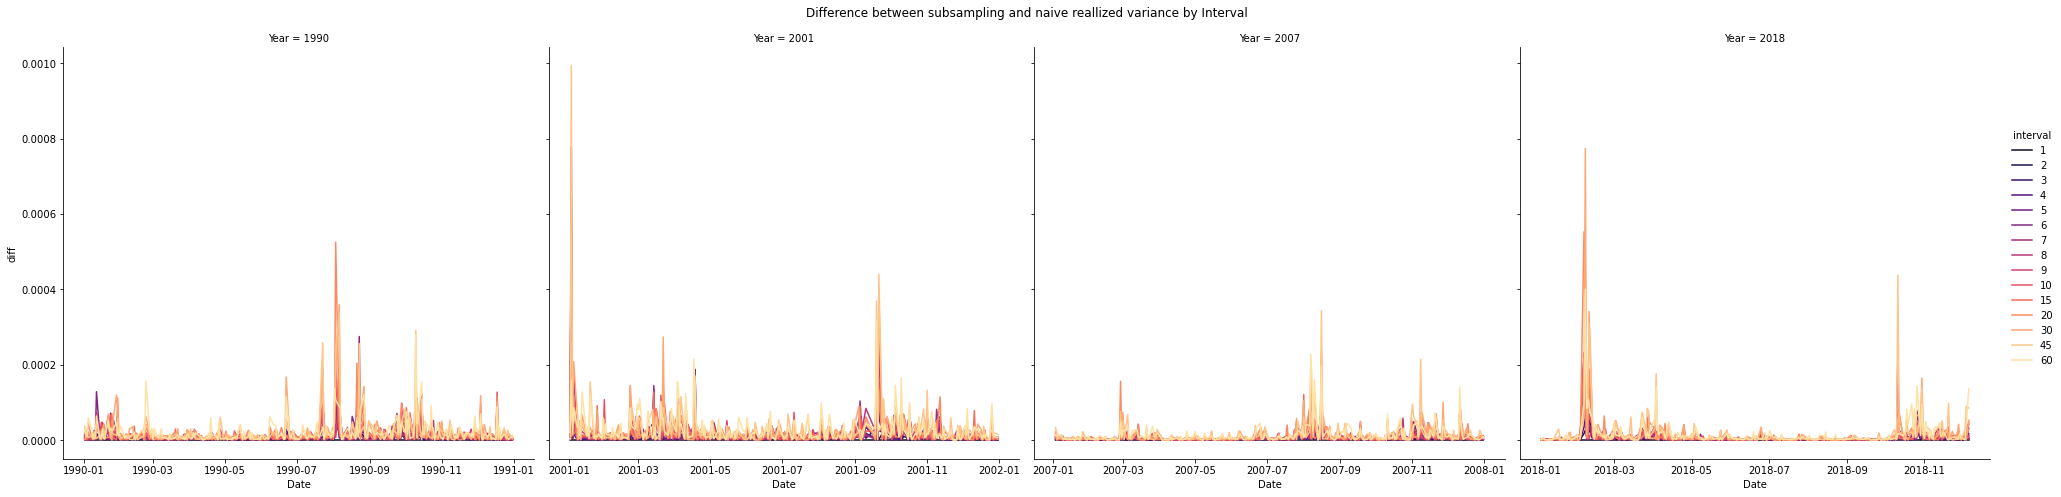

In [151]:
nvs = _df.pivot(index=["interval","Year", "Date"], columns="method", values="rv")
nvs["diff"] = np.abs(nvs["subsampling"] - nvs["naive"])
nvs = nvs.reset_index()
g = sns.FacetGrid(data=nvs, col="Year", hue="interval", sharex=False, height=7, palette="magma")
g.map_dataframe(sns.lineplot, x="Date", y="diff", legend="full")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Difference between subsampling and naive reallized variance by Interval')

Text(0.5, 0.98, 'Realized Variance Calculation by Method for each Year and Interval')

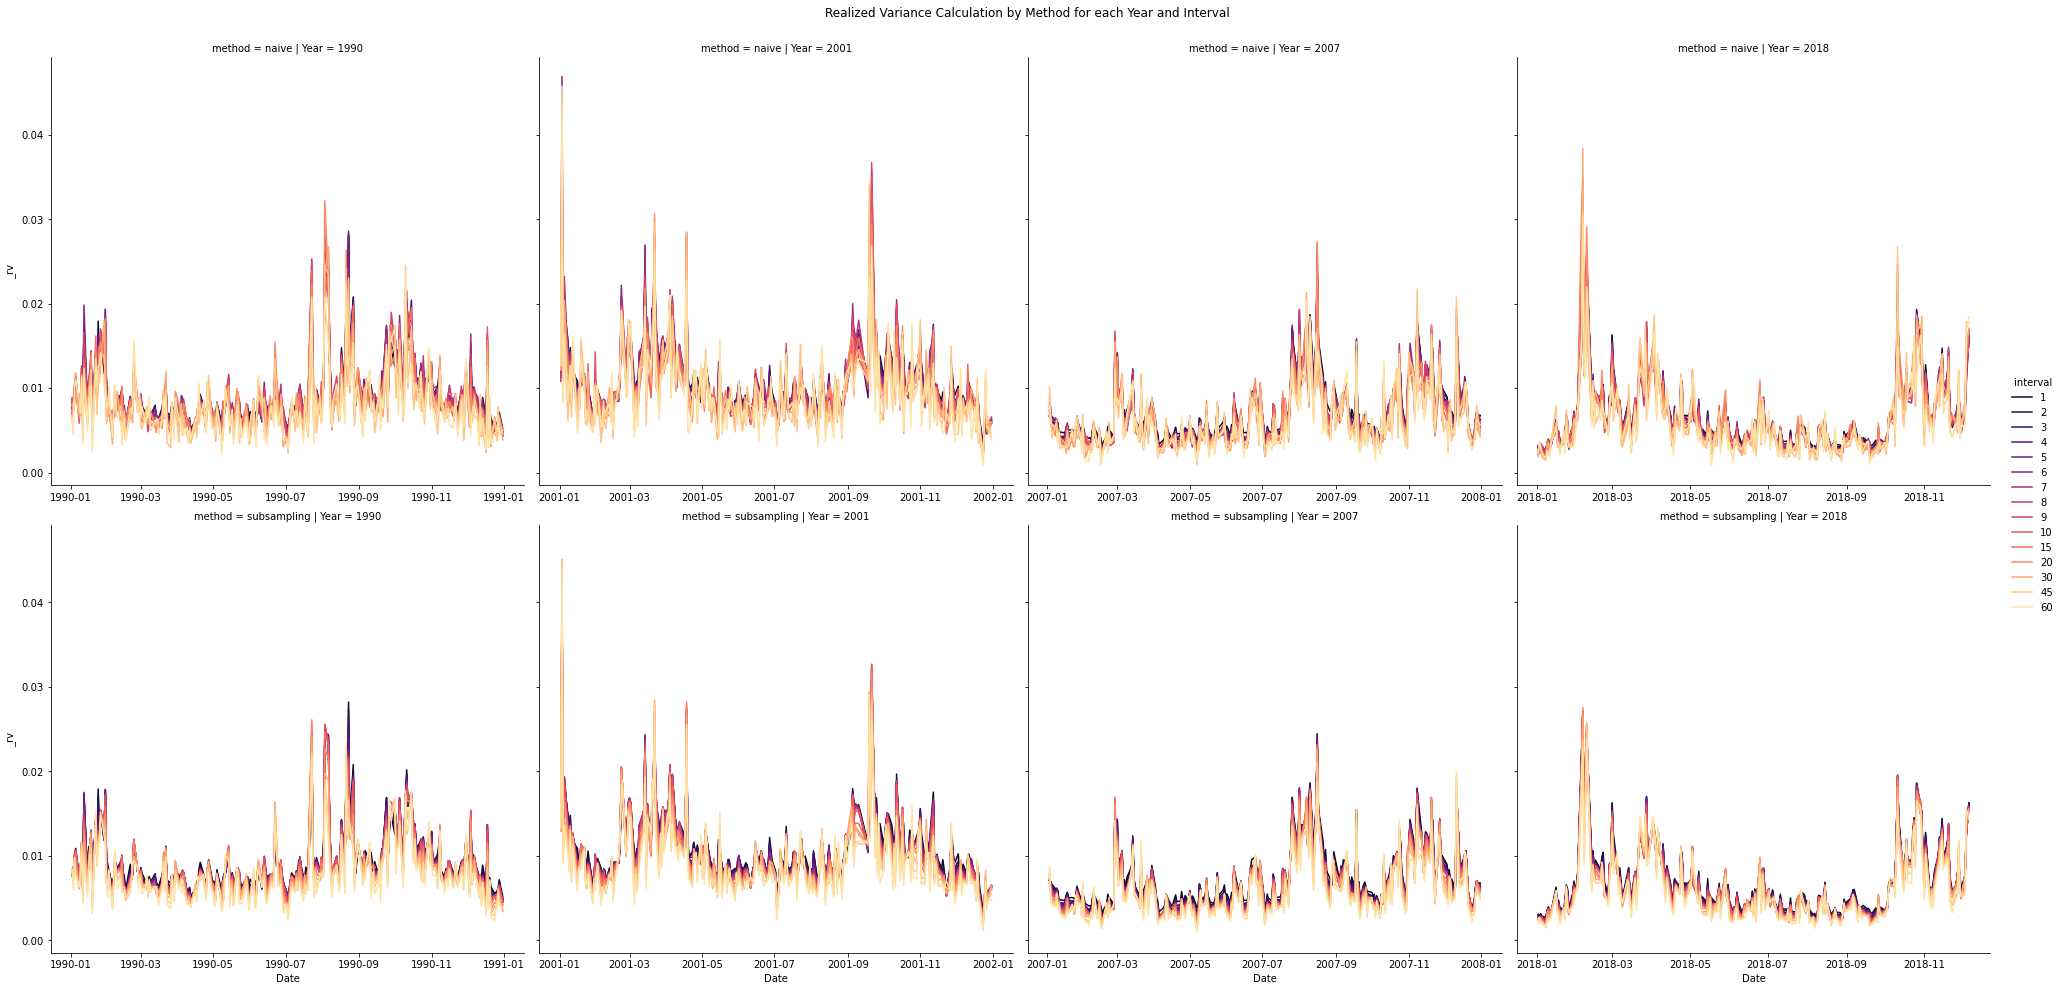

In [157]:
_df["_rv"] = np.sqrt(_df["rv"])
g = sns.FacetGrid(data=_df, row="method", col="Year",  hue="interval", sharex=False, height=7, palette="magma")
g.map_dataframe(sns.lineplot, x="Date", y="_rv", legend="full")
g.add_legend()
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle('Realized Variance Calculation by Method for each Year and Interval')

Text(0.5, 0.98, 'Volatility Calculation by Year, Type and Interval')

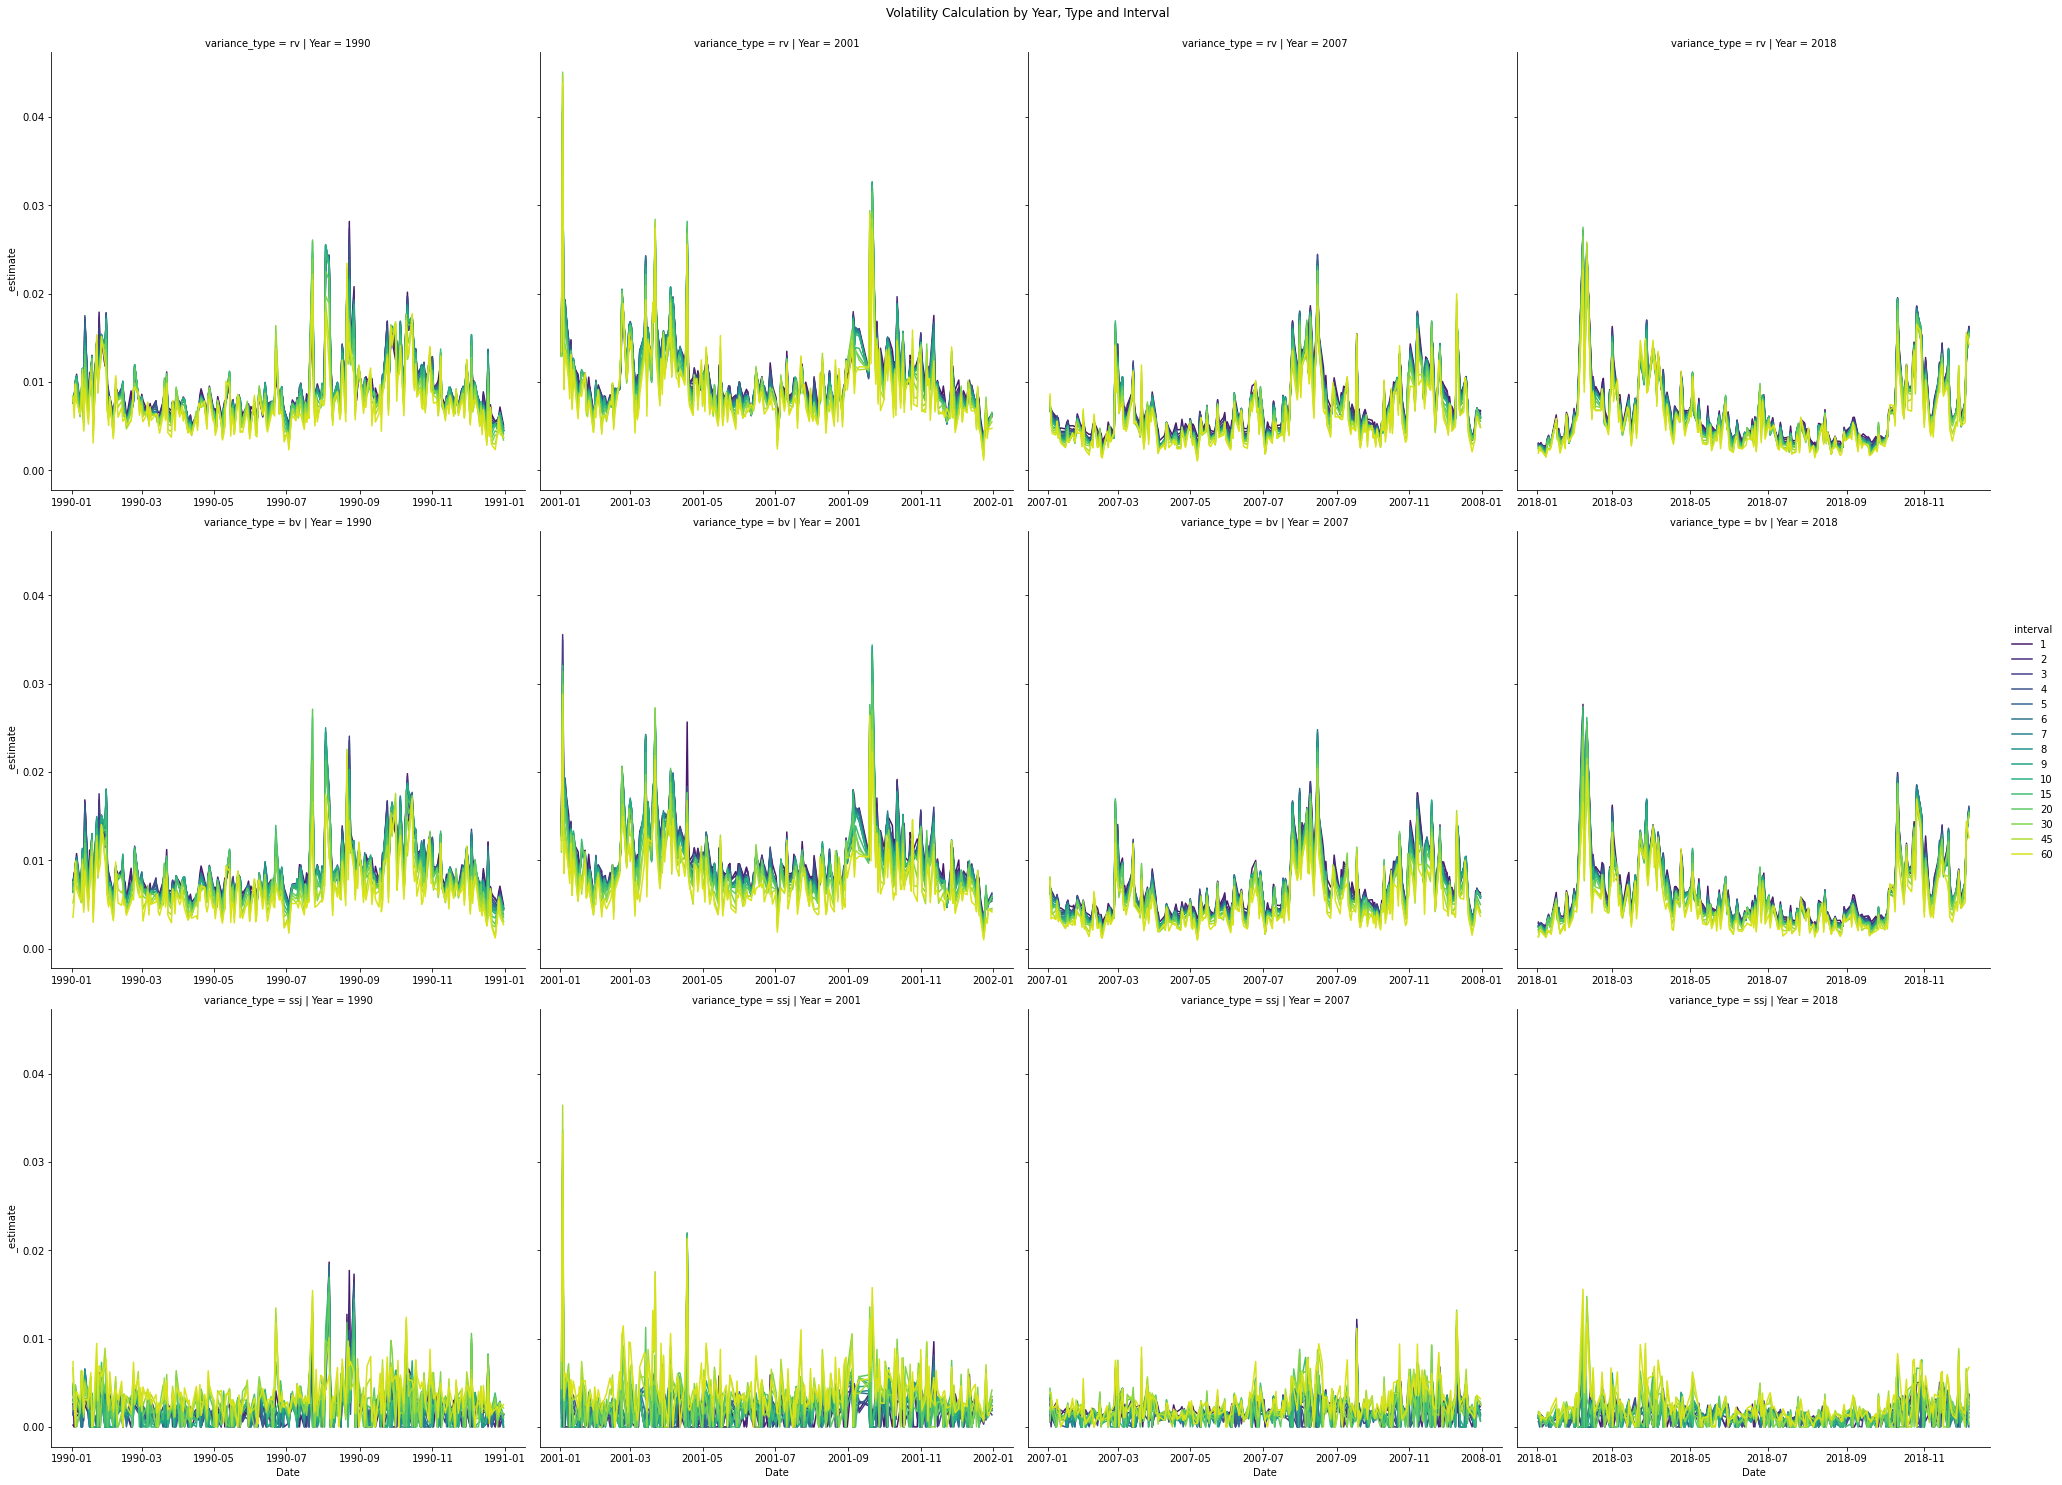

In [154]:
rdf["_estimate"] = np.sqrt(rdf["estimate"])
srdf = rdf.loc[rdf.method=="subsampling"]
g = sns.FacetGrid(data=srdf, row="variance_type", col="Year", hue="interval", sharex=False, sharey=True, height=7, palette="viridis")
g.map_dataframe(sns.lineplot, x="Date", y="_estimate", legend="full")
g.add_legend()
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Volatility Calculation by Year, Type and Interval')

Text(0.5, 0.98, 'Variance Calculation by Year, Type and Interval')

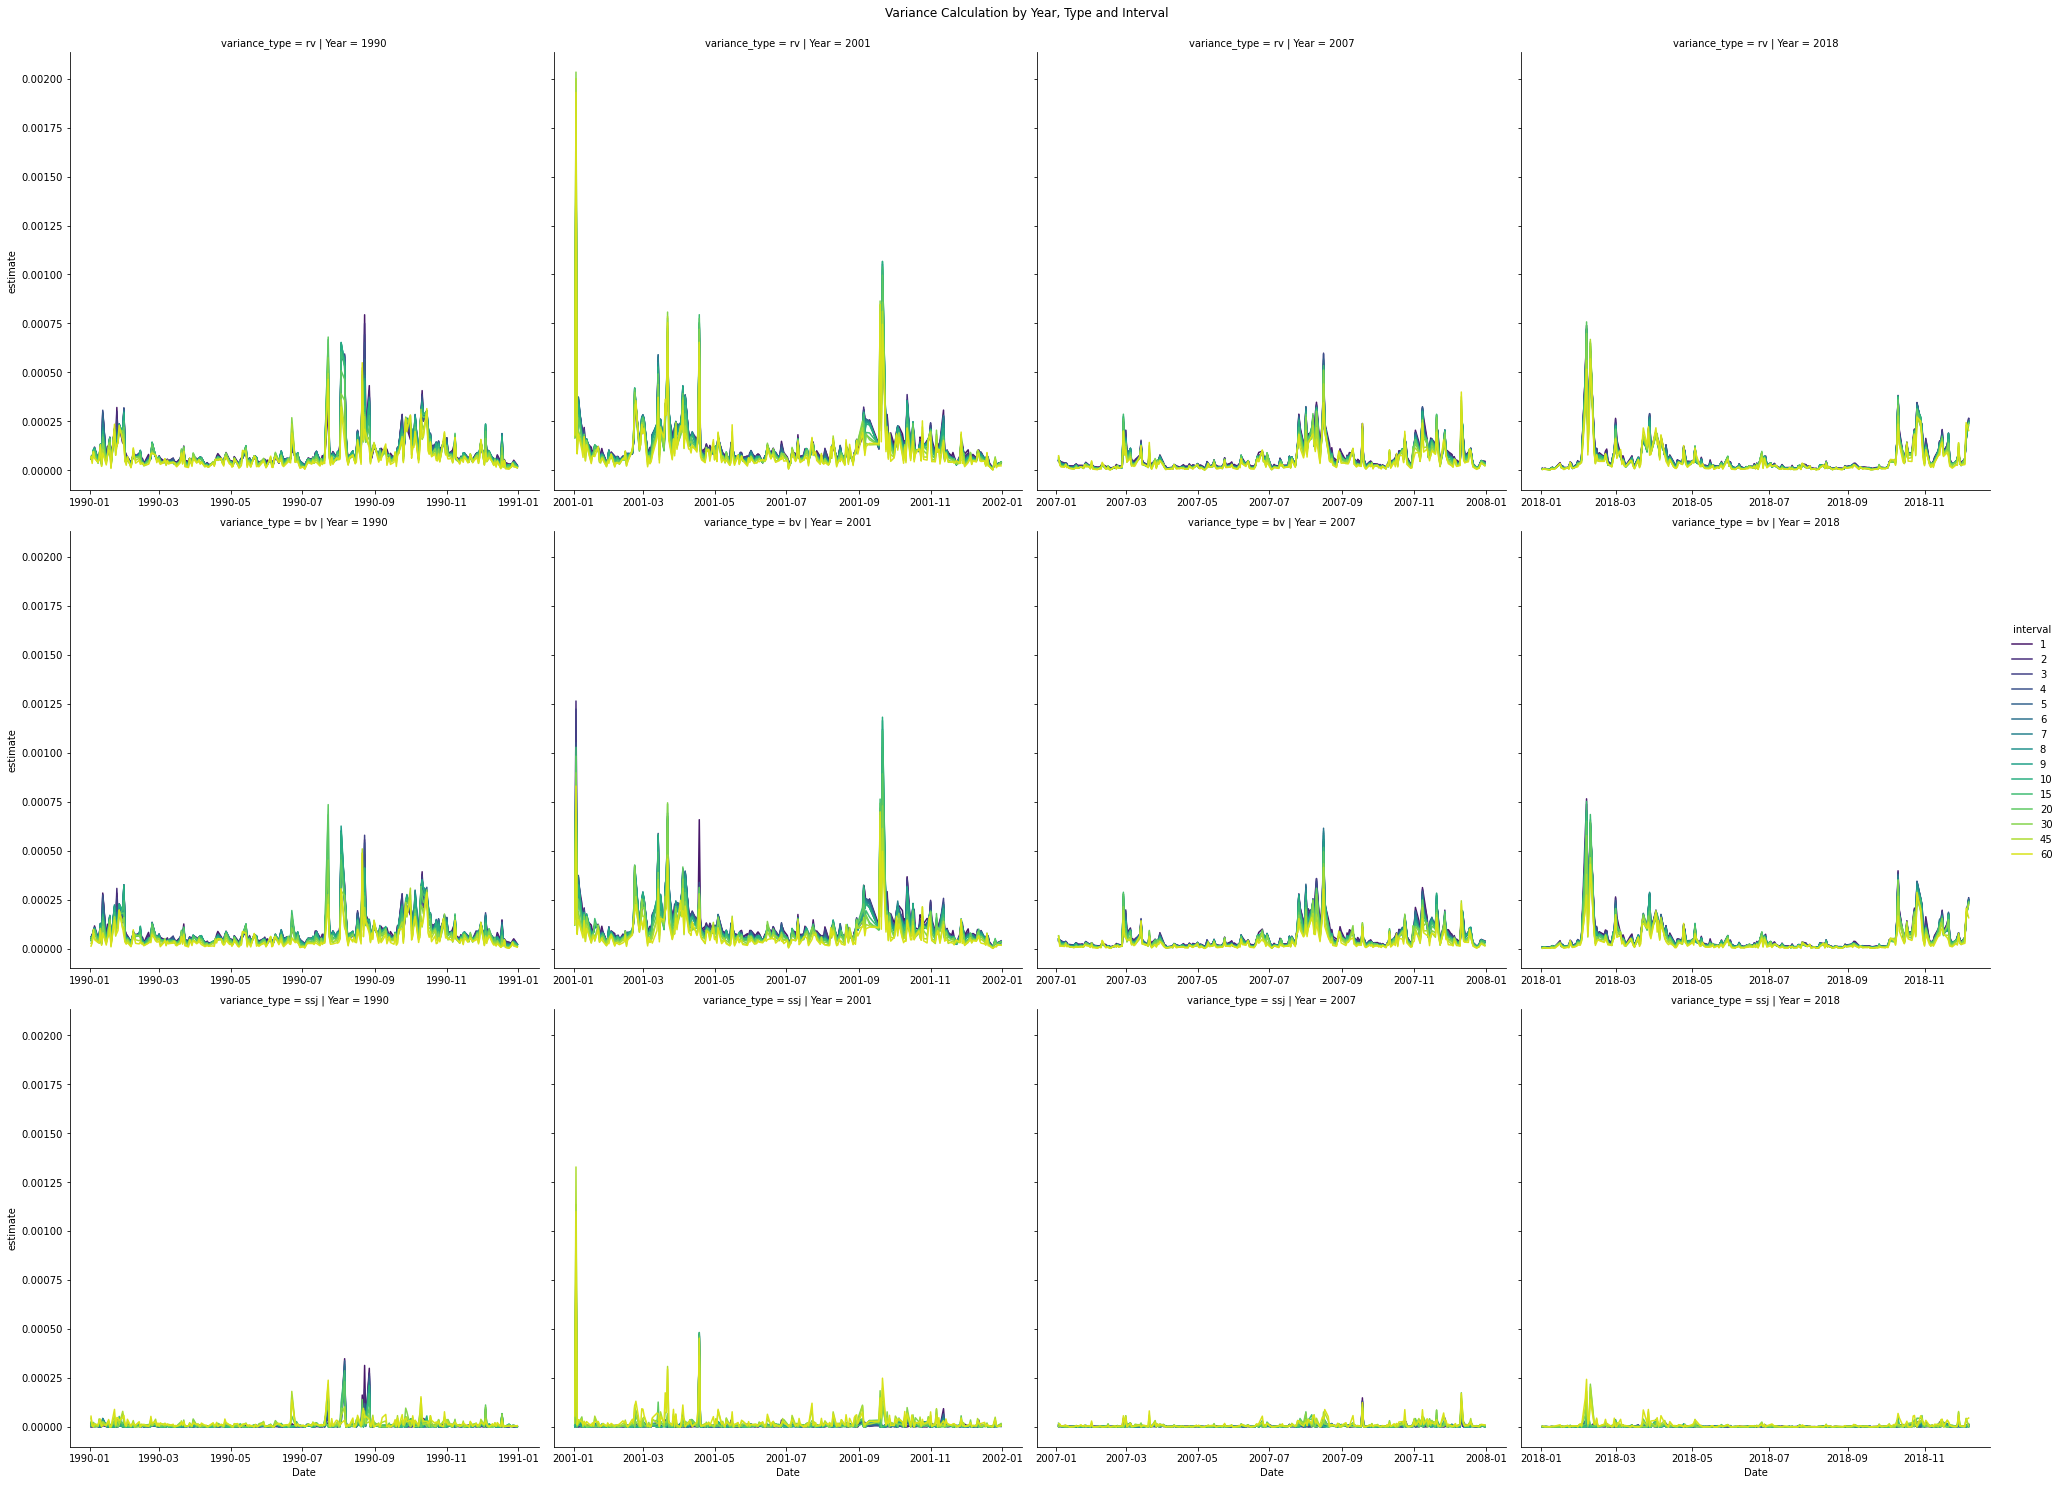

In [155]:
rdf["_estimate"] = np.sqrt(rdf["estimate"])
srdf = rdf.loc[rdf.method=="subsampling"]
g = sns.FacetGrid(data=srdf, row="variance_type", col="Year", hue="interval", sharex=False, sharey=True, height=7, palette="viridis")
g.map_dataframe(sns.lineplot, x="Date", y="estimate", legend="full")
g.add_legend()
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Variance Calculation by Year, Type and Interval')

In [15]:
_df = df.loc[df["method"] == "naive", ["Date", "ContractName", "interval", "rv"]]
_df["_Date"] = _df["Date"].apply(lambda x: x.toordinal())


In [118]:
_df = df.loc[~_df.duplicated(["method", "interval", "Date"], keep="last"), :]
_df = _df.reset_index(drop=True)
qq = _df.groupby(["interval", "Year"]).quantile(q=[0.50])
qq = _df.groupby(["interval", "Year","method"]).rv.describe()
qq = qq.reset_index()

In [119]:
qq.head()

,interval,Year,method,count,mean,std,min,25%,50%,75%,max
0,1,1990,naive,250.0,0.000099,0.000092,0.000026,0.000055,0.000070,0.000108,0.000794
1,1,1990,subsampling,250.0,0.000099,0.000092,0.000026,0.000055,0.000070,0.000108,0.000794
2,1,2001,naive,245.0,0.000136,0.000111,0.000012,0.000077,0.000102,0.000158,0.001049
3,1,2001,subsampling,245.0,0.000136,0.000111,0.000012,0.000077,0.000102,0.000158,0.001049
4,1,2007,naive,248.0,0.000071,0.000072,0.000011,0.000026,0.000043,0.000085,0.000561


Text(0.5, 1.0, 'Standard Deviation of Realized Variance vs calculation interval')

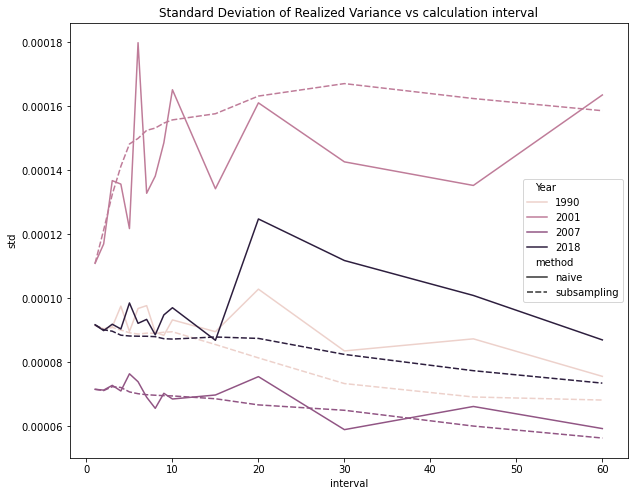

In [144]:
plt.subplots(figsize=(10, 8))
ax = sns.lineplot(data=qq, x="interval", hue="Year", y="std", style="method")
ax.set_title('Standard Deviation of Realized Variance vs Calculation Interval')

Text(0.5, 1.0, 'Median Realized Variance vs calculation interval')

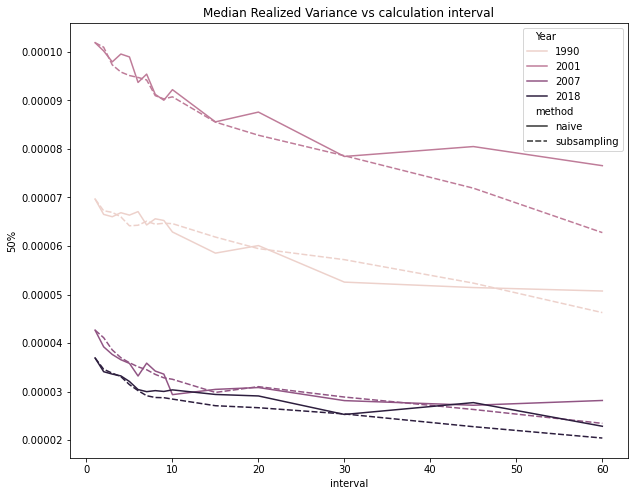

In [143]:
plt.subplots(figsize=(10, 8))
ax = sns.lineplot(data=qq, x="interval", hue="Year", y="50%", style="method")
ax.set_title('Median Realized Variance vs Calculation Interval')

In [132]:
from load_and_tranform import DataLoader, DataCleaner

pdfs = []
for YEAR in [1990,2001,2007,2018]:
    _pdf = DataLoader(YEAR).df
    _pdf = DataCleaner(_pdf).df
    pdfs.append(_pdf)


In [133]:
pdf = pd.concat(pdfs)

In [135]:
pdf.head()

,Date,TimeZone,ContractName,Open,Close,High,Low,LastTradedPrice,LagSameContractLastTradedPrice,Volume,NbTrade,LogReturn,date
0,1990-01-02 09:31:59,ET,SPH90,356.45,356.80,356.80,356.45,356.80,356.50,0.0,10.0,0.000841,1990-01-02
1,1990-01-02 09:32:59,ET,SPH90,356.75,356.50,356.80,356.50,356.50,356.80,0.0,13.0,-0.000841,1990-01-02
2,1990-01-02 09:33:59,ET,SPH90,356.45,356.15,356.50,356.15,356.15,356.50,0.0,11.0,-0.000982,1990-01-02
3,1990-01-02 09:34:59,ET,SPH90,356.10,356.00,356.10,356.00,356.00,356.15,0.0,13.0,-0.000421,1990-01-02
4,1990-01-02 09:35:59,ET,SPH90,355.95,355.65,355.95,355.50,355.65,356.00,0.0,13.0,-0.000984,1990-01-02


In [138]:

pdf["Date"] = pd.to_datetime(pdf.Date)
pdf["Year"] = pdf.Date.dt.year
cumulLogReturn = pdf.groupby("Year").apply(lambda x: x.LogReturn.cumsum())

In [141]:
pdf["cumulLogReturn"] = cumulLogReturn.values

Text(0.5, 0.98, 'Cumulative Log Return by Year')

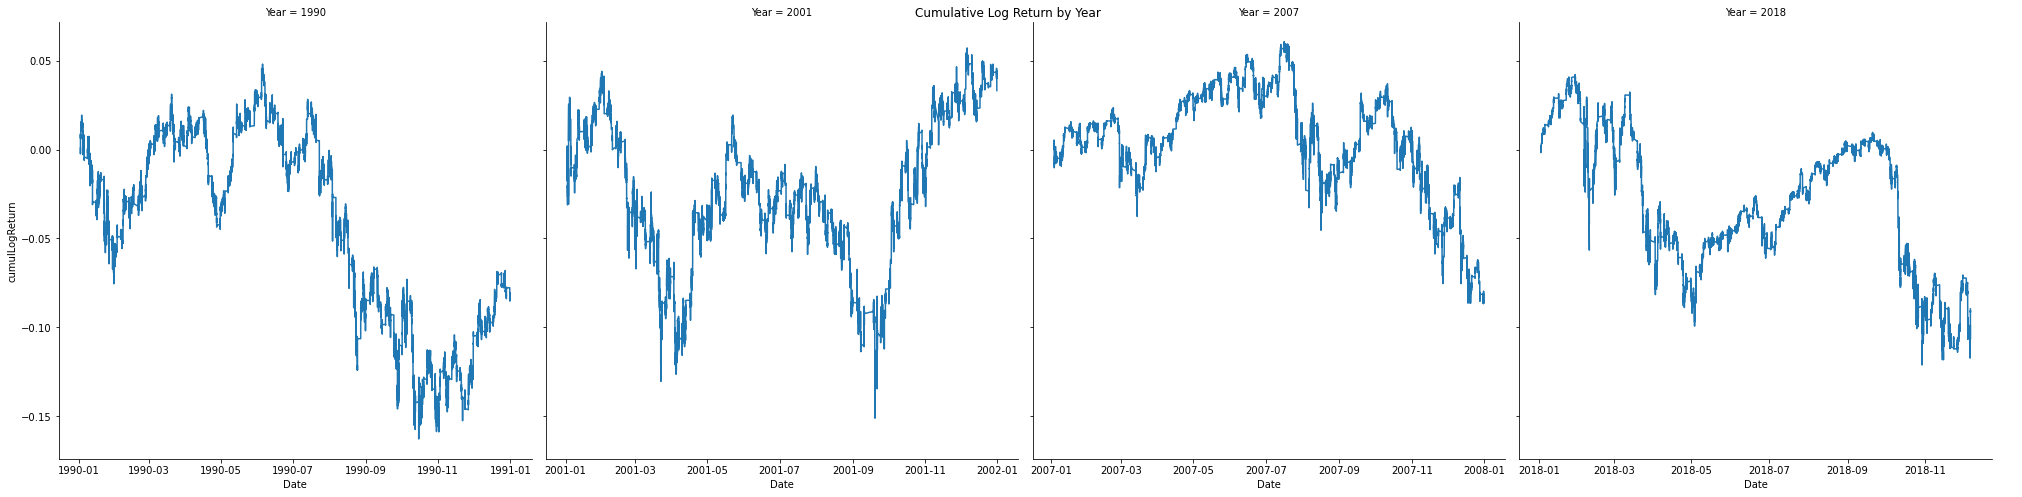

In [158]:
g = sns.FacetGrid(data=pdf, col="Year", sharex=False, height=7, palette="magma")
g.map_dataframe(sns.lineplot, x="Date", y="cumulLogReturn", legend="full")
g.add_legend()
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Cumulative Log Return by Year')